In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import random

In [2]:

red_wine = pd.read_csv("C:\\Users\\pixal\\Desktop\\WPy64-312101\\notebooks\\wine+quality\\winequality-red_c.csv")

In [3]:
red_wine.shape

(1599, 12)

In [4]:
white_wine = pd.read_csv("C:\\Users\\pixal\\Desktop\\WPy64-312101\\notebooks\\wine+quality\\winequality-white_c.csv")

In [5]:
white_wine.shape

(4898, 12)

In [6]:
 wine_all_dataset=pd.concat((white_wine, red_wine), axis=0) 

In [7]:
wine_all_dataset.shape

(6497, 12)

In [8]:
wine_all_dataset.to_csv("C:\\Users\\pixal\\Desktop\\WPy64-312101\\notebooks\\wine+quality\\winequality_c.csv",index=False,)

In [9]:
wine_all_dataset.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.092e+03, 6.280e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <BarContainer object of 10 artists>)

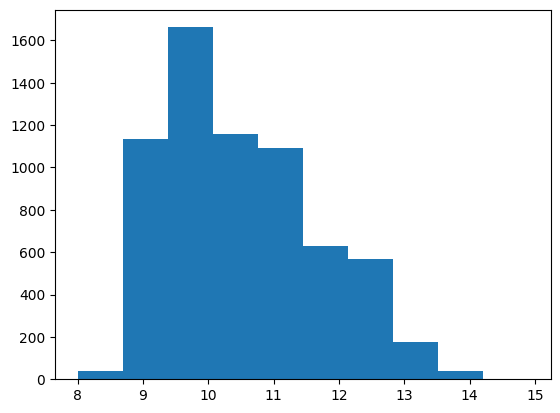

In [10]:
plt.hist(wine_all_dataset['alcohol'], bins=10)
#wine_dataset['alcohol'].plot(kind='bar')
#plt.show()

<Axes: ylabel='Frequency'>

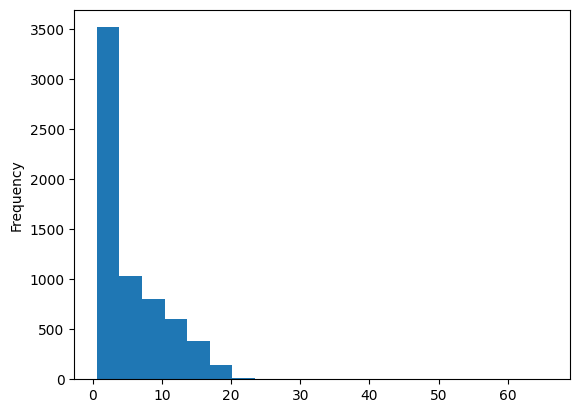

In [11]:
wine_all_dataset['residual_sugar'].plot(kind='hist',bins=20)
#plt.hist(wine_dataset['residual_sugar'], bins=100)

In [12]:
wine_all_dataset
wine_all_dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = white_wine[['alcohol', 'residual_sugar']]
Xz = pd.DataFrame(stats.zscore(X), columns=['alcohol', 'residual_sugar'])

In [14]:
Kmean01 = KMeans(n_clusters = 2).fit(Xz)

In [15]:
cluster = Kmean01.labels_
cluster

array([1, 0, 1, ..., 0, 0, 0], shape=(4898,), dtype=int32)

In [16]:
Cluster1 = Xz.loc[cluster == 0]
Cluster2 = Xz.loc[cluster == 1]

In [17]:
Cluster1.describe()

,alcohol,residual_sugar
count,2915.000000,2915.000000
mean,0.538166,-0.639027
std,0.882423,0.477758
min,-1.474421,-1.141944
25%,-0.092863,-0.984201
50%,0.476014,-0.865894
75%,1.207427,-0.353229
max,2.995326,1.796020


In [18]:
Cluster2.describe()

,alcohol,residual_sugar
count,1983.000000,1983.000000
mean,-0.791102,0.939366
std,0.523735,0.807602
min,-2.043297,-1.072931
25%,-1.149348,0.317179
50%,-0.905544,0.908715
75%,-0.499203,1.480534
max,1.857572,11.714112


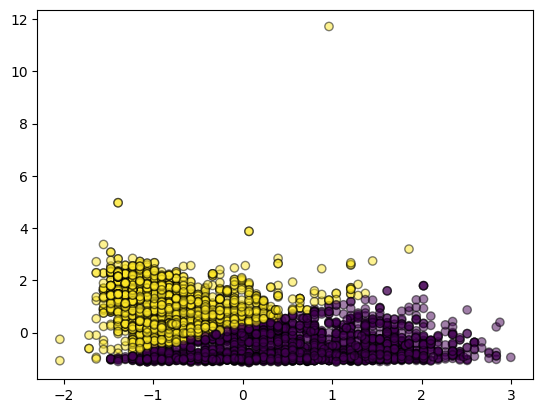

In [29]:

# Visualize
centroids = Kmean01.cluster_centers_
labels = Kmean01.labels_
#plt.figure(figsize=(8, 6))
plt.scatter(Xz['alcohol'], Xz['residual_sugar'], c=labels, cmap='viridis', alpha=0.5, edgecolors='k', label='Data Points')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
#plt.show()
#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.show()
